In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# 1. Import dataset and display first 5 rows
df = pd.read_csv("TvMarketing.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [4]:

# 2. Check column data types
print("\nData types:\n", df.dtypes)


Data types:
 TV       float64
Sales    float64
dtype: object


In [5]:

# 3. Check the shape of the Data Frame
print("\nShape of dataset:", df.shape)


Shape of dataset: (200, 2)


In [6]:

# 4. Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
                TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


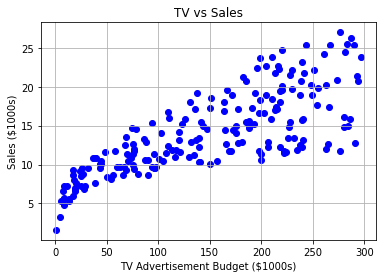

In [7]:
# 5. Visualize relationship using scatterplot
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel('TV Advertisement Budget ($1000s)')
plt.ylabel('Sales ($1000s)')
plt.title('TV vs Sales')
plt.grid(True)
plt.show()


In [8]:
# 6. Prepare X and y
X = df[['TV']].values
y = df['Sales'].values

In [9]:
# 7. Split data into Training and Testing Sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
# 8. Print the shape of train and test data
print("\nTrain set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (140, 1)
Test set size: (60, 1)


In [11]:
# 9. Linear Regression without using libraries (manual calculation)
# y = mX + c; m = slope, c = intercept
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

numerator = np.sum((X_train - x_mean) * (y_train - y_mean))
denominator = np.sum((X_train - x_mean)**2)

m = numerator / denominator
c = y_mean - m * x_mean

print("\nManual Regression Coefficients:")
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")


Manual Regression Coefficients:
Slope (m): -6.498430666560763e-19
Intercept (c): 13.79142857142857


In [12]:
# 10. Predict on test set using manual model
y_pred_manual = m * X_test + c


In [13]:
# 11. Linear Regression using sklearn
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# 12. Print the intercept and coefficients
print("\nSklearn Linear Regression Coefficients:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Sklearn Linear Regression Coefficients:
Intercept: 6.923519536059553
Slope: 0.04812204162796225


In [15]:
# 13. Predict on test set using sklearn model
y_pred = model.predict(X_test)

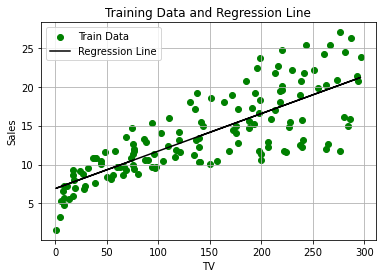

In [16]:
# 14. Plot train data and model
plt.scatter(X_train, y_train, color='green', label='Train Data')
plt.plot(X_train, model.predict(X_train), color='black', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Training Data and Regression Line')
plt.legend()
plt.grid(True)
plt.show()


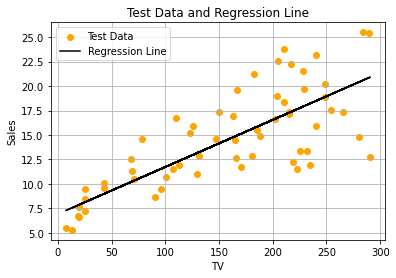

In [17]:
# 15. Plot test data and model
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_test, y_pred, color='black', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Test Data and Regression Line')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# 16. Mean Squared Error and R Squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 10.571057434656955
R² Score: 0.575061860494331


In [19]:
# 17. Manual R² and Adjusted R² calculation
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_pred_manual.flatten())**2)

r2_manual = 1 - (ss_res / ss_total)
n = len(y_test)
p = 1  # only 1 feature (TV)
adj_r2 = 1 - ((1 - r2_manual) * (n - 1) / (n - p - 1))

print("\nManual R²:", r2_manual)
print("Adjusted R²:", adj_r2)


Manual R²: -0.023848291357023488
Adjusted R²: -0.04150084810455845
